In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [24]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Label','Alcohol','Malic Acid']

In [27]:
df.shape


(178, 3)

In [46]:
X_train=df.iloc[:140,1:]
X_test=df.iloc[140:,1:]
y_train=df.iloc[:140,:1]
y_test=df.iloc[140:,:1]

mms=MinMaxScaler()
mms.fit(X_train)
X_train_scaled=mms.transform(X_train)
X_test_scaled=mms.transform(X_test)

In [47]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((140, 2), (38, 2), (140, 1), (38, 1))

In [53]:
y_train.sample()

,Label
117,2


In [58]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [59]:
X_train.describe(),X_train_scaled.describe()

(          Alcohol  Malic Acid
 count  140.000000  140.000000
 mean    12.930000    2.046643
 std      0.861772    0.958029
 min     11.030000    0.740000
 25%     12.280000    1.510000
 50%     12.855000    1.730000
 75%     13.687500    2.160000
 max     14.830000    5.800000,
           Alcohol  Malic Acid
 count  140.000000  140.000000
 mean     0.500000    0.258230
 std      0.226782    0.189334
 min      0.000000    0.000000
 25%      0.328947    0.152174
 50%      0.480263    0.195652
 75%      0.699342    0.280632
 max      1.000000    1.000000)

In [60]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [61]:
X_test.describe(),X_test_scaled.describe()

(         Alcohol  Malic Acid
 count  38.000000   38.000000
 mean   13.260789    3.403684
 std     0.523896    1.017175
 min    12.200000    1.290000
 25%    12.885000    2.692500
 50%    13.295000    3.285000
 75%    13.610000    4.052500
 max    14.340000    5.650000,
          Alcohol  Malic Acid
 count  38.000000   38.000000
 mean    0.587050    0.526420
 std     0.137867    0.201023
 min     0.307895    0.108696
 25%     0.488158    0.385870
 50%     0.596053    0.502964
 75%     0.678947    0.654644
 max     0.871053    0.970356)

Text(0.5, 1.0, 'After Scaling')

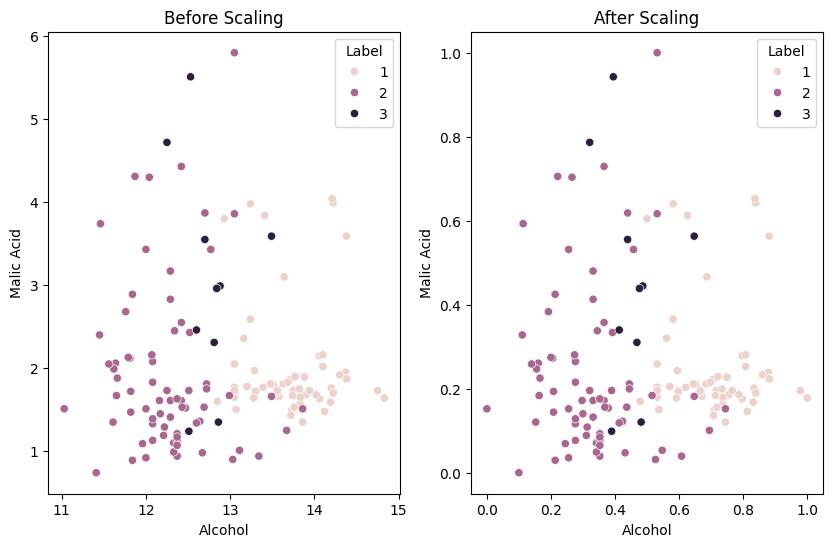

In [78]:
import matplotlib.pyplot as plt

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))

sns.scatterplot(x=X_train['Alcohol'],y=X_train['Malic Acid'],hue=y_train['Label'],ax=ax1)
ax1.set_title('Before Scaling')

sns.scatterplot(x=X_train_scaled['Alcohol'],y= X_train_scaled['Malic Acid'], hue=y_train['Label'],ax=ax2)
ax2.set_title('After Scaling')


Text(0.5, 1.0, 'After Scaling')

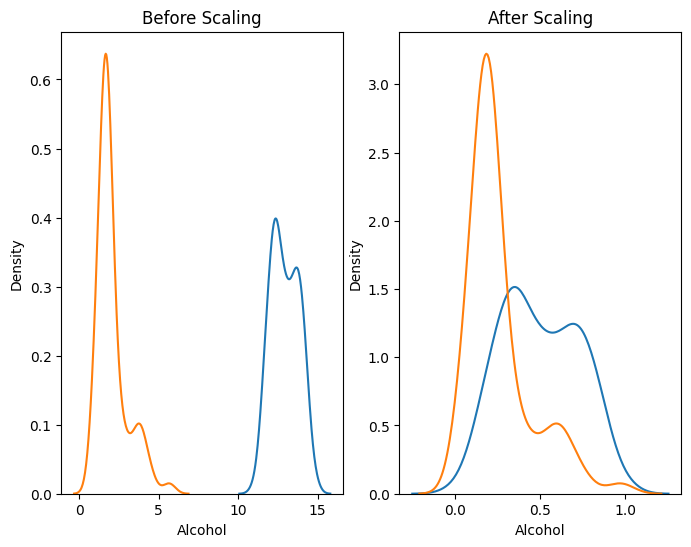

In [71]:


fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,6))

sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
ax2.set_title('After Scaling')


In [80]:
from sklearn.preprocessing import RobustScaler

rs=RobustScaler()
rs.fit(X_train)
X_train_rs=rs.transform(X_train)
X_test_rs=rs.transform(X_test)

In [81]:
X_train_rs=pd.DataFrame(X_train_rs,columns=X_train.columns)
X_test_rs=pd.DataFrame(X_test_rs,columns=X_train.columns)

In [83]:
X_train.describe(),X_train_rs.describe()

(          Alcohol  Malic Acid
 count  140.000000  140.000000
 mean    12.930000    2.046643
 std      0.861772    0.958029
 min     11.030000    0.740000
 25%     12.280000    1.510000
 50%     12.855000    1.730000
 75%     13.687500    2.160000
 max     14.830000    5.800000,
             Alcohol  Malic Acid
 count  1.400000e+02  140.000000
 mean   5.328597e-02    0.487143
 std    6.122711e-01    1.473891
 min   -1.296625e+00   -1.523077
 25%   -4.085258e-01   -0.338462
 50%   -6.310057e-16    0.000000
 75%    5.914742e-01    0.661538
 max    1.403197e+00    6.261538)

Text(0.5, 1.0, 'After Scaling')

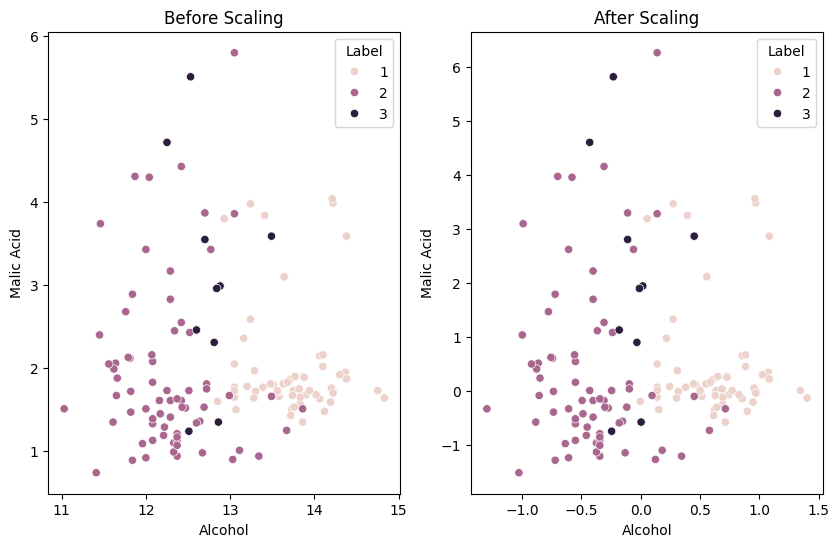

In [84]:
import matplotlib.pyplot as plt

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,6))

sns.scatterplot(x=X_train['Alcohol'],y=X_train['Malic Acid'],hue=y_train['Label'],ax=ax1)
ax1.set_title('Before Scaling')

sns.scatterplot(x=X_train_rs['Alcohol'],y= X_train_rs['Malic Acid'], hue=y_train['Label'],ax=ax2)
ax2.set_title('After Scaling')


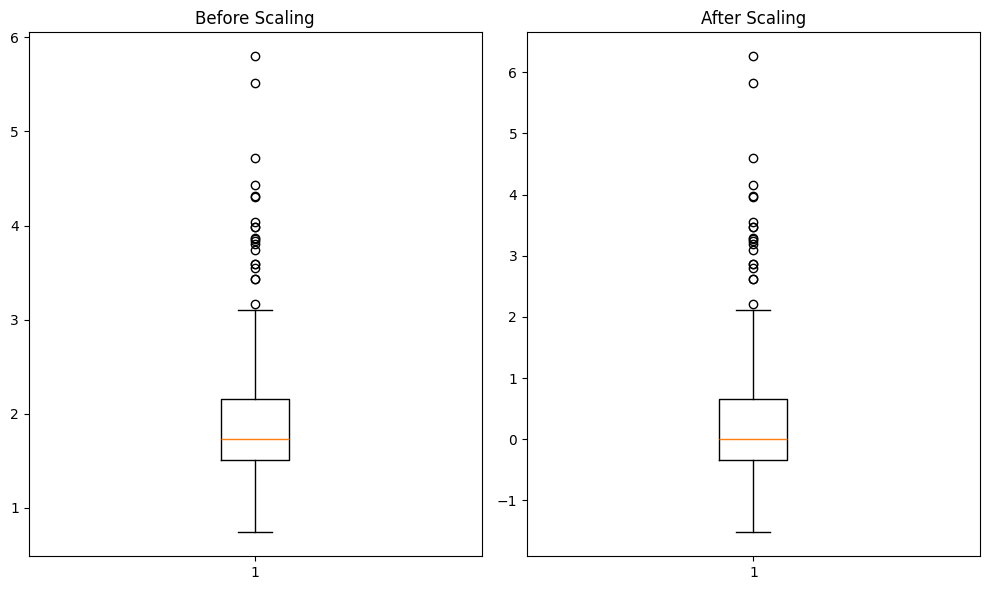

In [94]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,6))

ax1.boxplot(X_train['Malic Acid'])
ax1.set_title('Before Scaling')

ax2.boxplot(X_train_rs['Malic Acid'])
ax2.set_title('After Scaling')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'After Scaling')

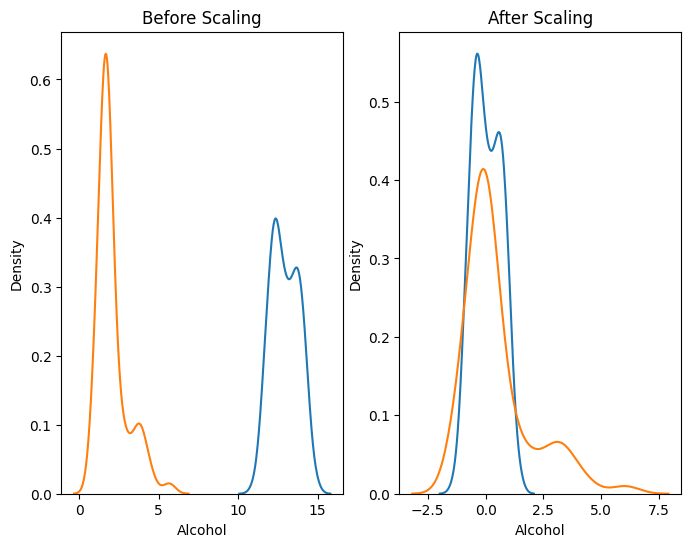

In [95]:


fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,6))

sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_rs['Alcohol'],ax=ax2)
sns.kdeplot(X_train_rs['Malic Acid'],ax=ax2)
ax2.set_title('After Scaling')
